# Import functions

In [1]:
from bones.sv.image.datasets import ImageNette
from bones.sv.image.metrics import L1, L2
from bones.sv.image.evaluation import Benchmark
from bones.sv.image.explainers import VitShapleyModel, DeepExplainerModel, GradientExplainerModel, FastSHAPModel

In [2]:
benchmark=Benchmark(
    explainers=[VitShapleyModel, DeepExplainerModel, GradientExplainerModel], 
    ground_truth=FastSHAPModel, 
    dataset=[ImageNette], 
    metrics=[L1, L2], 
    num_samples=5
)

In [3]:
benchmark.run(verbose=True, load=True)

DATASET: ImageNette

LOADING CLASSIFIER BACKBONE

Initialize Classifier

Initialize Data
	Loading train and val data

Initialize Grand Truth
/home/dnapolitano/BONES/models/ImageNette_surrogate.pt
		LOADING SURROGATE
	Training explainer model
		LOADING EXPLAINER

Ground Truth: FastSHAP

Initializing Explainers
	Explainer: <class 'bones.sv.image.explainers.models.VitShapleyModel'>
		LOADING SURROGATE BACKBONE
		LOADING EXPLAINER BACKBONE
	Explainer: <class 'bones.sv.image.explainers.models.DeepExplainerModel'>
	Explainer: <class 'bones.sv.image.explainers.models.GradientExplainerModel'>

Explainers: dict_keys(['FastSHAP', 'VitShapley', 'DeepExplainer', 'GradientExplainer'])
Metrics: dict_keys(['L1', 'L2'])

Running Explainers


100%|██████████| 1/1 [00:06<00:00,  6.99s/it]

----------------------------------------------------------------------------------------------------


In [6]:
benchmark.print_results(ImageNette)

╒═══════════════════╤═════════════════╤══════════════════╤══════════════╤══════════╤═══════════╕
│      Method       │  Time Training  │  Time Inference  │  Time Total  │    L1    │    L2     │
╞═══════════════════╪═════════════════╪══════════════════╪══════════════╪══════════╪═══════════╡
│     FastSHAP      │        0        │        0.732121  │    0.732121  │ 0        │ 0         │
├───────────────────┼─────────────────┼──────────────────┼──────────────┼──────────┼───────────┤
│    VitShapley     │        0        │        0.0344765 │    0.0344765 │ 0.383056 │ 0.129042  │
├───────────────────┼─────────────────┼──────────────────┼──────────────┼──────────┼───────────┤
│   DeepExplainer   │        0        │        2.59747   │    2.59747   │ 0.29297  │ 0.0882128 │
├───────────────────┼─────────────────┼──────────────────┼──────────────┼──────────┼───────────┤
│ GradientExplainer │        0        │        3.96482   │    3.96482   │ 0.291086 │ 0.0878916 │
╘═══════════════════╧═════════

In [4]:
from bones.sv.image.display import ImagePlot, AUCPlot, TimeSamplePlot, QuadrantPlot

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


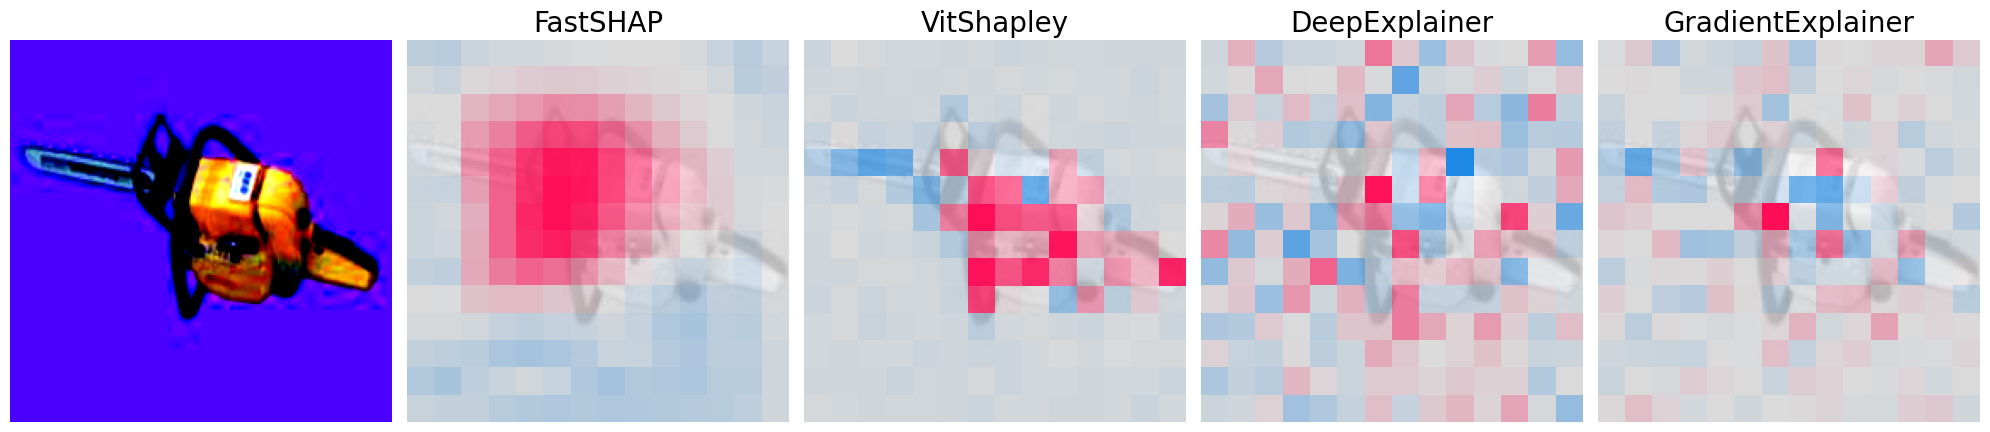

In [8]:
ImagePlot(benchmark, ImageNette).plot(index=1)

Loading evaluator


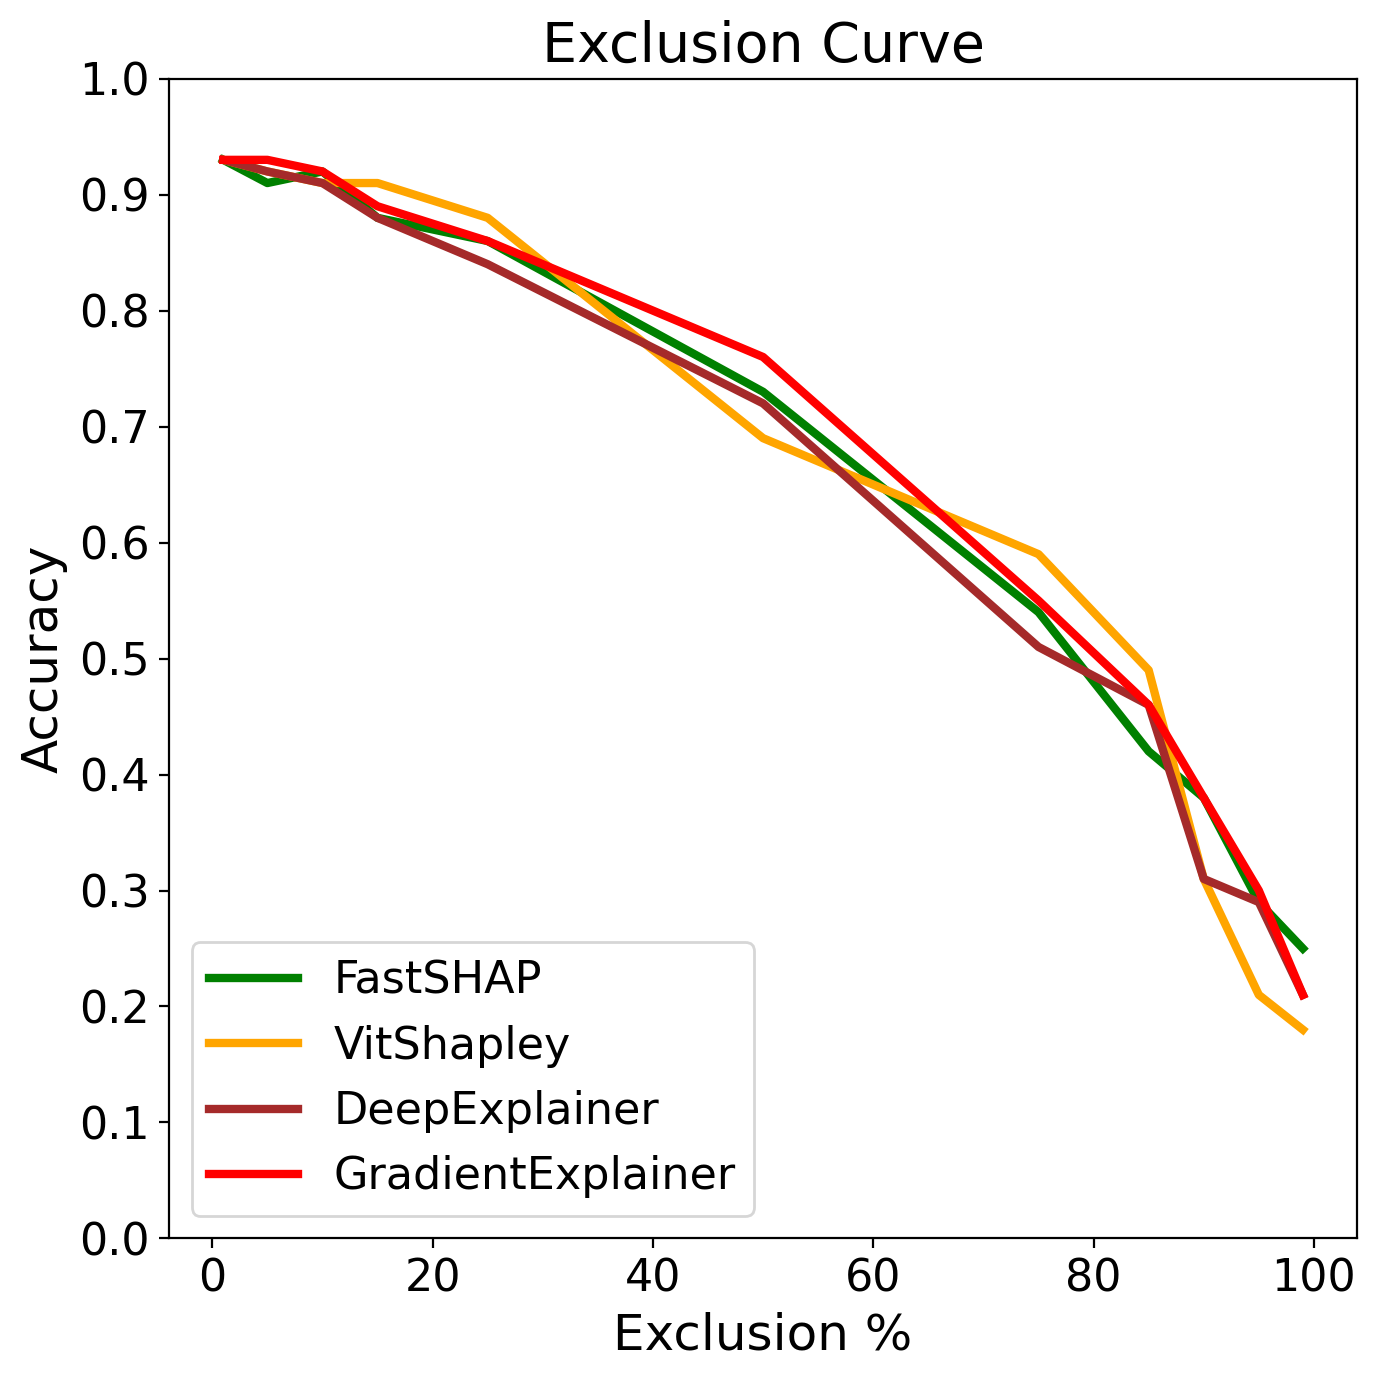

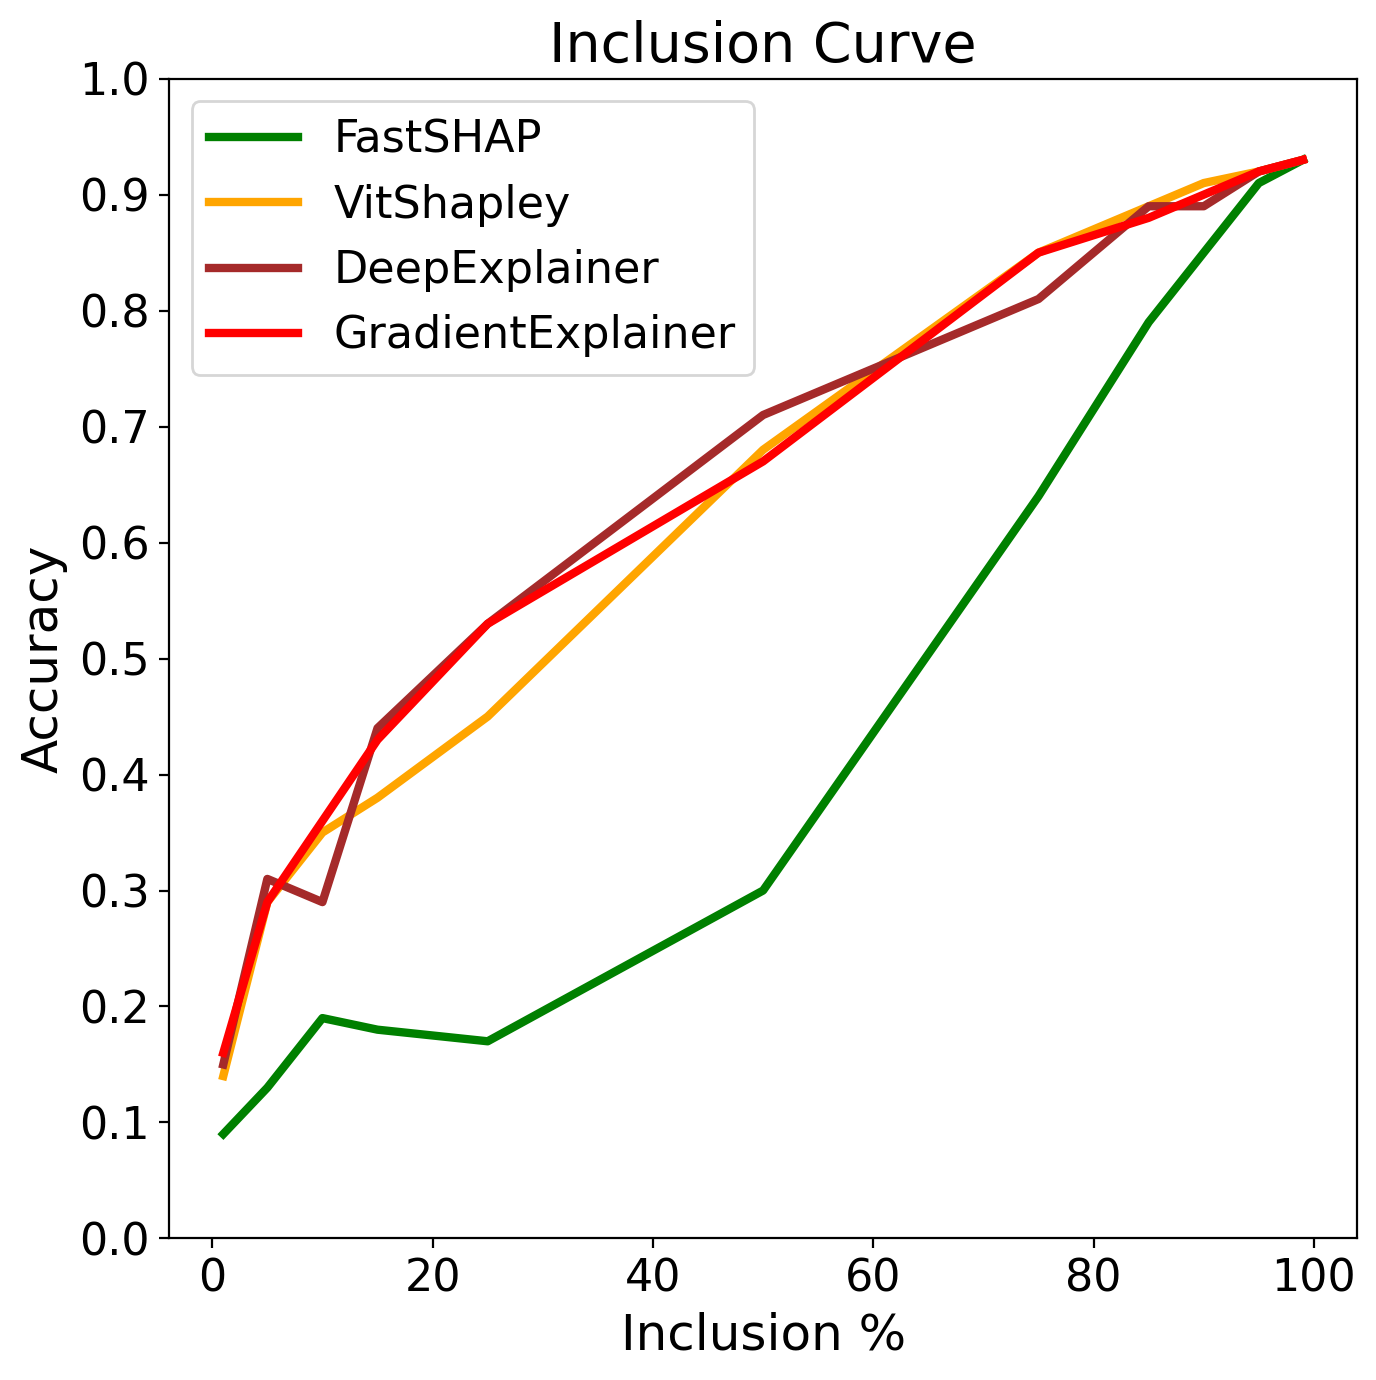

In [5]:
AUCPlot(benchmark, ImageNette, 100).plot(verbose=True)

DATASET: ImageNette

LOADING CLASSIFIER BACKBONE

Initialize Classifier

Initialize Data
	Loading train and val data

Initialize Grand Truth
/home/dnapolitano/BONES/models/ImageNette_surrogate.pt
		LOADING SURROGATE
	Training explainer model
		LOADING EXPLAINER

Ground Truth: FastSHAP

Initializing Explainers
	Explainer: <class 'bones.sv.image.explainers.models.VitShapleyModel'>
		LOADING SURROGATE BACKBONE
		LOADING EXPLAINER BACKBONE
	Explainer: <class 'bones.sv.image.explainers.models.DeepExplainerModel'>
	Explainer: <class 'bones.sv.image.explainers.models.GradientExplainerModel'>

Explainers: dict_keys(['FastSHAP', 'VitShapley', 'DeepExplainer', 'GradientExplainer'])
Metrics: dict_keys(['L1', 'L2'])

Running Explainers


100%|██████████| 25/25 [02:57<00:00,  7.11s/it]


----------------------------------------------------------------------------------------------------


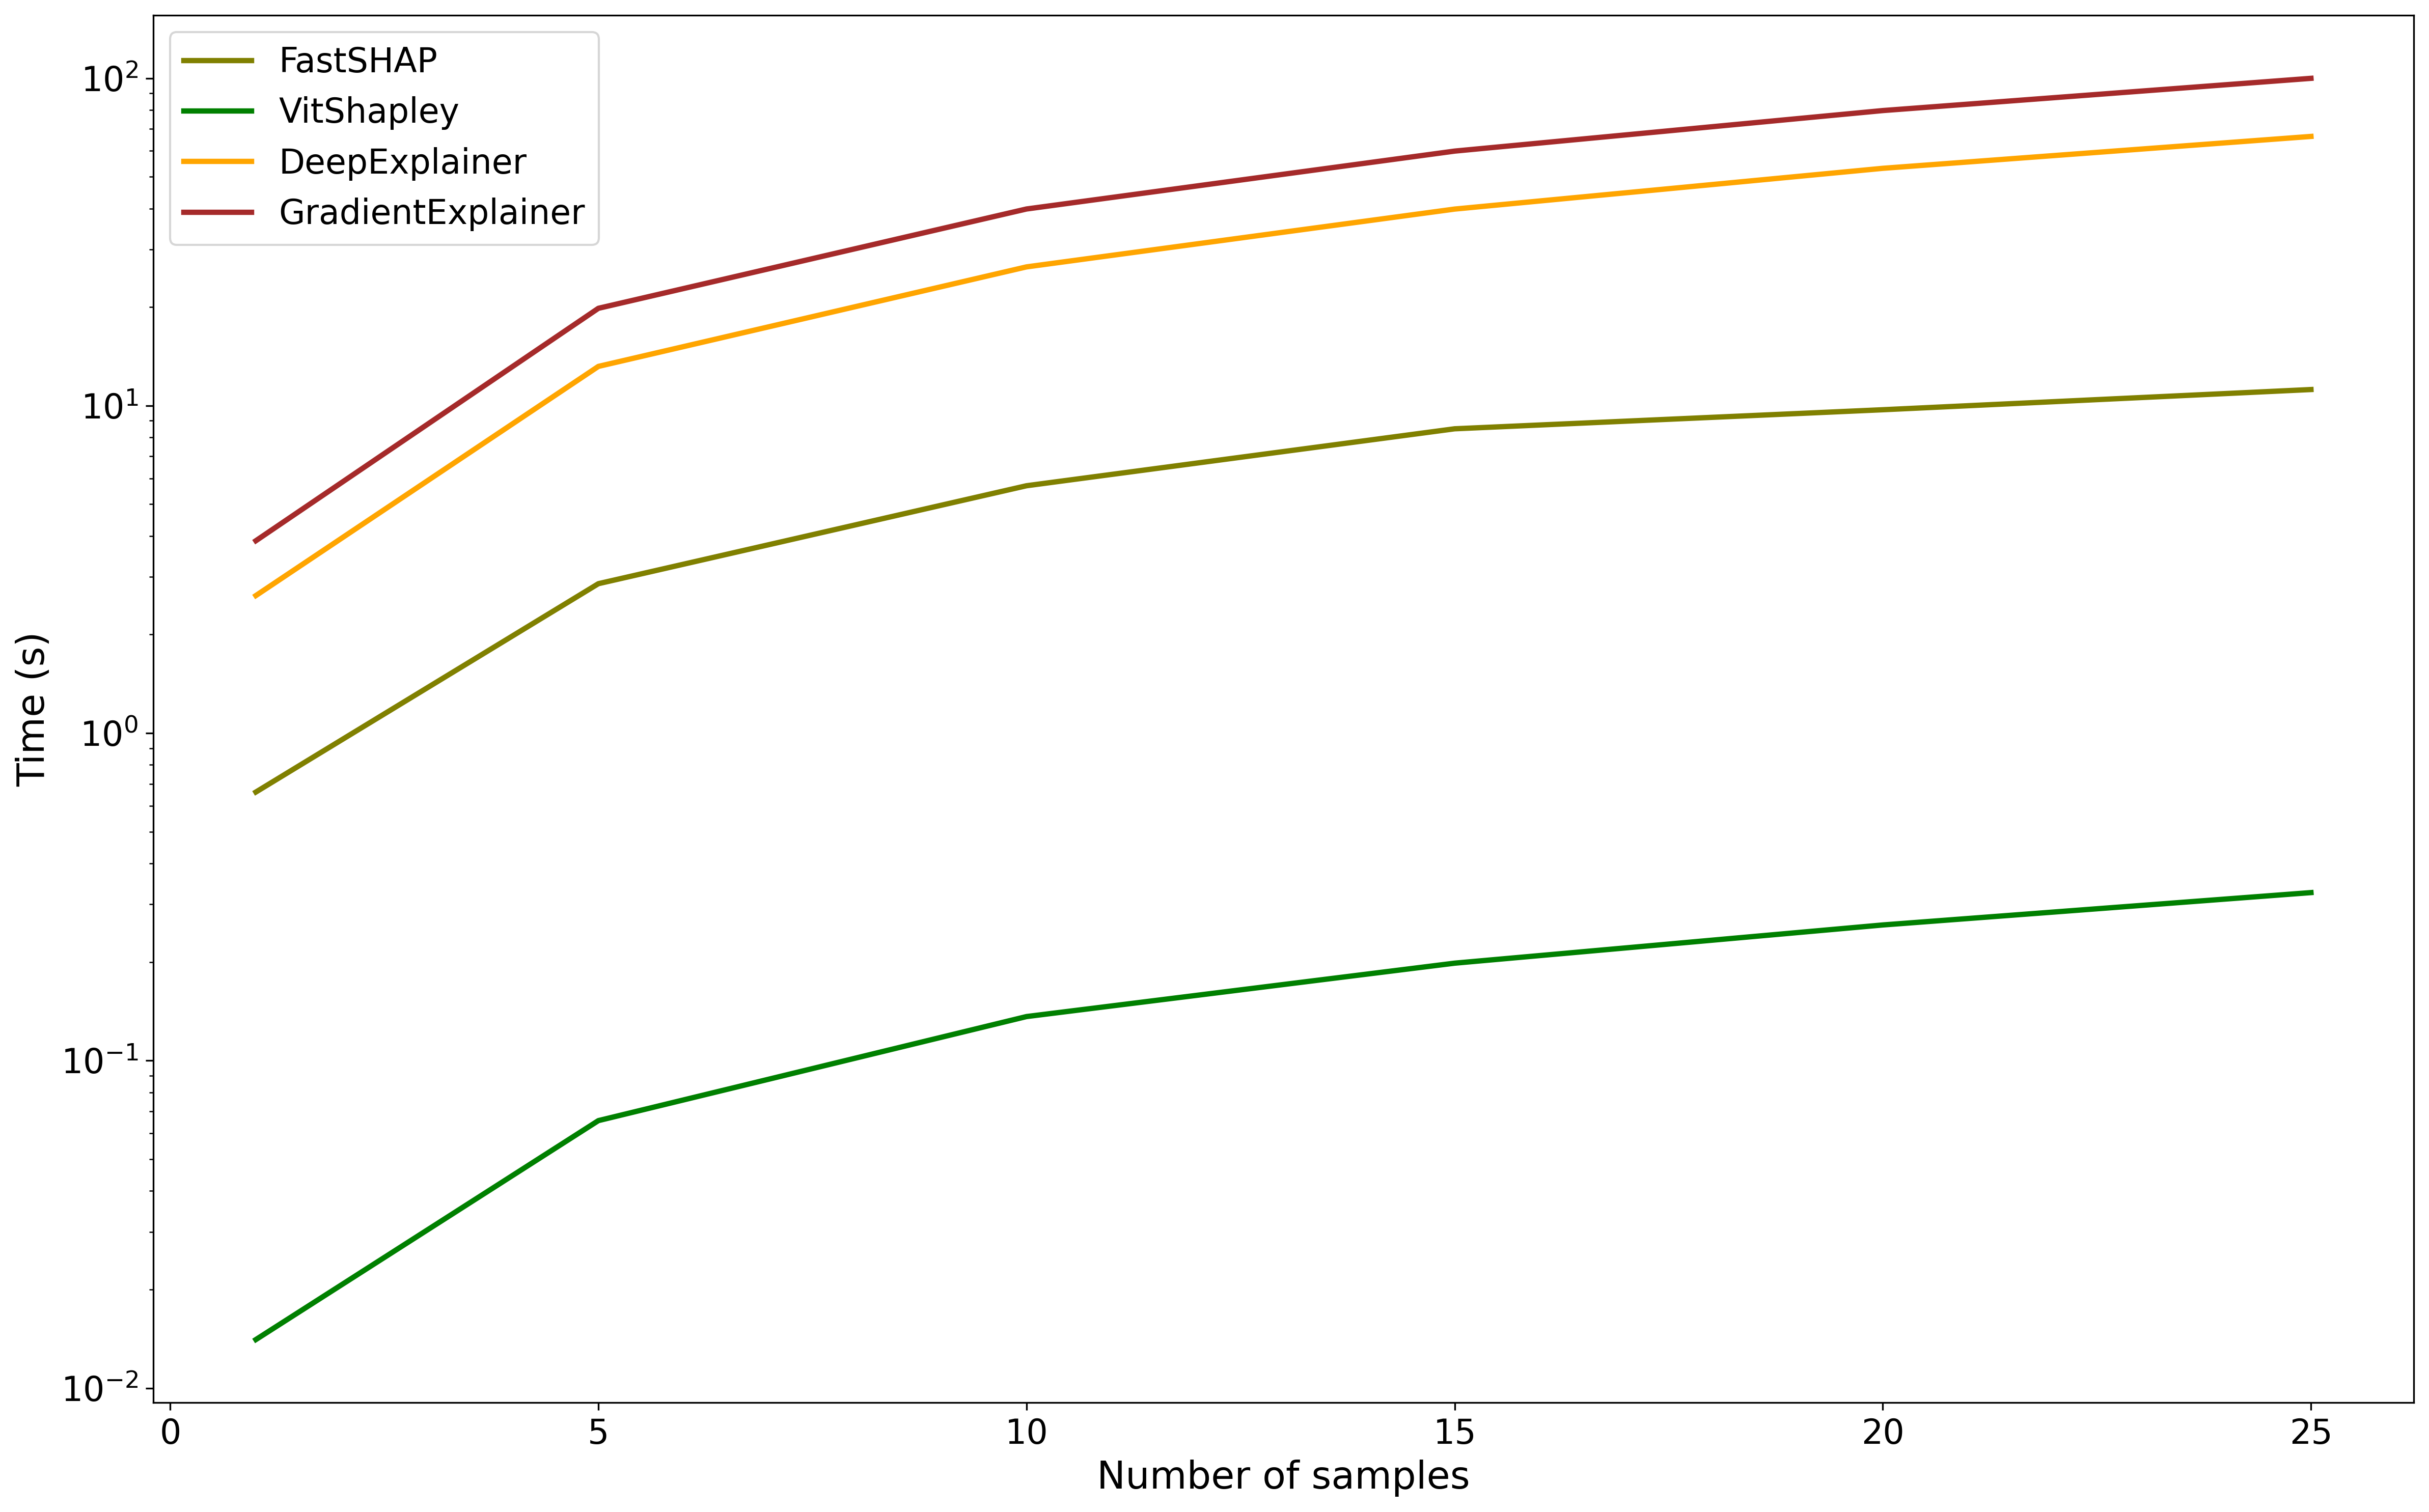

In [5]:
TimeSamplePlot(benchmark, dataset=ImageNette, number_samples=25, interval=5, sample_method="random").plot()

In [6]:
QuadrantPlot(benchmark, ImageNette).plot()